In [34]:
from generate_stream import generate_stream
from benchmarking_function import benchmark_all_algos
from collections import Counter

import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
### Testing with one distribution

stream_lengths = [1000, 5000, 10000]
# memory for MisraGries and sketch width
memory_sizes = [20, 50, 100]  
distribution = "zipf"
depth = 5

summary_rows = []

for length in stream_lengths:
    for memory in memory_sizes:
        print(f"Running -- Stream Length: {length} | Memory: {memory} --")

        stream = generate_stream(distribution, length=length, item_pool=100)
        true_counts = Counter(stream)

        mem_config = {
            "misra_gries_k": memory,
            "sketch_width": memory,
            "sketch_depth": depth
        }

        result = benchmark_all_algos(stream, true_counts, mem_config)

        for algo in result:
            errors = result[algo]["errors"]
            abs_errors = [v[2] for v in errors.values()]
            rel_errors = [v[3] for v in errors.values()]
            summary_rows.append({
                "Algorithm": algo,
                "StreamLength": length,
                "MemorySize": memory,
                "MeanAbsError": np.mean(abs_errors),
                "MeanRelError": np.mean(rel_errors),
                "Runtime": result[algo]["runtime"]
            })


Running -- Stream Length: 1000 | Memory: 20 --
Running -- Stream Length: 1000 | Memory: 50 --
Running -- Stream Length: 1000 | Memory: 100 --
Running -- Stream Length: 5000 | Memory: 20 --
Running -- Stream Length: 5000 | Memory: 50 --
Running -- Stream Length: 5000 | Memory: 100 --
Running -- Stream Length: 10000 | Memory: 20 --
Running -- Stream Length: 10000 | Memory: 50 --
Running -- Stream Length: 10000 | Memory: 100 --


In [36]:
# convert to dataframe
benchmark_df = pd.DataFrame(summary_rows)
display(benchmark_df)

,Algorithm,StreamLength,MemorySize,MeanAbsError,MeanRelError,Runtime
0,MisraGries,1000,20,7.628866,0.961522,0.000604
1,CountMinSketch,1000,20,13.051546,3.797272,0.010704
2,CountSketch,1000,20,18.298969,5.408590,0.018717
3,CountMedian,1000,20,9.731959,2.833695,0.016044
4,MisraGries,1000,50,4.639175,0.794639,0.000277
5,CountMinSketch,1000,50,2.061856,0.426664,0.007077
6,CountSketch,1000,50,9.216495,2.948755,0.013742
7,CountMedian,1000,50,3.474227,0.828612,0.013557
8,MisraGries,1000,100,0.000000,0.000000,0.000172
9,CountMinSketch,1000,100,0.185567,0.026022,0.006789


In [37]:
# save file
benchmark_df.to_csv("../results/benchmark_summary.csv", index=False)

In [38]:
### Run experiment with different stream lengths and memory sizes for all distributions

distributions = ["uniform", "zipf", "bursty"]
stream_lengths = [1000, 5000, 10000]
memory_sizes = [20, 50, 100]
depth = 5

# keep records
summary_rows = []

for dist in distributions:
    for length in stream_lengths:
        for memory in memory_sizes:
            print(f"Running -- Dist: {dist} | Stream Length: {length} | Memory: {memory} --")

            stream = generate_stream(distribution=dist, length=length, item_pool=100)
            true_counts = Counter(stream)

            mem_config = {
                "misra_gries_k": (memory * depth) // 2,
                "sketch_width": memory,
                "sketch_depth": depth
            }

            result = benchmark_all_algos(stream, true_counts, mem_config)

            for algo in result:
                errors = result[algo]["errors"]
                topk = result[algo]["topk"]
                abs_errors = [v[2] for v in errors.values()]
                rel_errors = [v[3] for v in errors.values()]
                summary_rows.append({
                    "Algorithm": algo,
                    "Distribution": dist,
                    "StreamLength": length,
                    "MemorySize": memory,
                    "MeanAbsError": np.mean(abs_errors),
                    "MeanRelError": np.mean(rel_errors),
                    "Runtime": result[algo]["runtime"],
                    "Precision@10": topk["precision@k"],
                    "Recall@10": topk["recall@k"],
                    "F1@10": topk["f1@k"]
                })


Running -- Dist: uniform | Stream Length: 1000 | Memory: 20 --
Running -- Dist: uniform | Stream Length: 1000 | Memory: 50 --
Running -- Dist: uniform | Stream Length: 1000 | Memory: 100 --
Running -- Dist: uniform | Stream Length: 5000 | Memory: 20 --
Running -- Dist: uniform | Stream Length: 5000 | Memory: 50 --
Running -- Dist: uniform | Stream Length: 5000 | Memory: 100 --
Running -- Dist: uniform | Stream Length: 10000 | Memory: 20 --
Running -- Dist: uniform | Stream Length: 10000 | Memory: 50 --
Running -- Dist: uniform | Stream Length: 10000 | Memory: 100 --
Running -- Dist: zipf | Stream Length: 1000 | Memory: 20 --
Running -- Dist: zipf | Stream Length: 1000 | Memory: 50 --
Running -- Dist: zipf | Stream Length: 1000 | Memory: 100 --
Running -- Dist: zipf | Stream Length: 5000 | Memory: 20 --
Running -- Dist: zipf | Stream Length: 5000 | Memory: 50 --
Running -- Dist: zipf | Stream Length: 5000 | Memory: 100 --
Running -- Dist: zipf | Stream Length: 10000 | Memory: 20 --
Runn

In [39]:
# convert to dataframe
benchmark_df = pd.DataFrame(summary_rows)
display(benchmark_df)


,Algorithm,Distribution,StreamLength,MemorySize,MeanAbsError,MeanRelError,Runtime,Precision@10,Recall@10,F1@10
0,MisraGries,uniform,1000,20,9.50,0.951598,0.000514,0.2,0.2,0.2
1,CountMinSketch,uniform,1000,20,26.05,2.875941,0.008781,0.1,0.1,0.1
2,CountSketch,uniform,1000,20,7.46,0.827999,0.017771,0.1,0.1,0.1
3,CountMedian,uniform,1000,20,9.10,1.033755,0.016118,0.2,0.2,0.2
4,MisraGries,uniform,1000,50,0.00,0.000000,0.000201,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
103,CountMedian,bursty,10000,50,15.20,0.539173,0.136293,0.5,0.5,0.5
104,MisraGries,bursty,10000,100,0.00,0.000000,0.001698,1.0,1.0,1.0
105,CountMinSketch,bursty,10000,100,1.83,0.060637,0.066815,0.4,0.4,0.4
106,CountSketch,bursty,10000,100,64.85,2.611150,0.136988,0.4,0.4,0.4


In [40]:
# save file
benchmark_df.to_csv("../results/benchmark_multi_dist.csv", index=False)

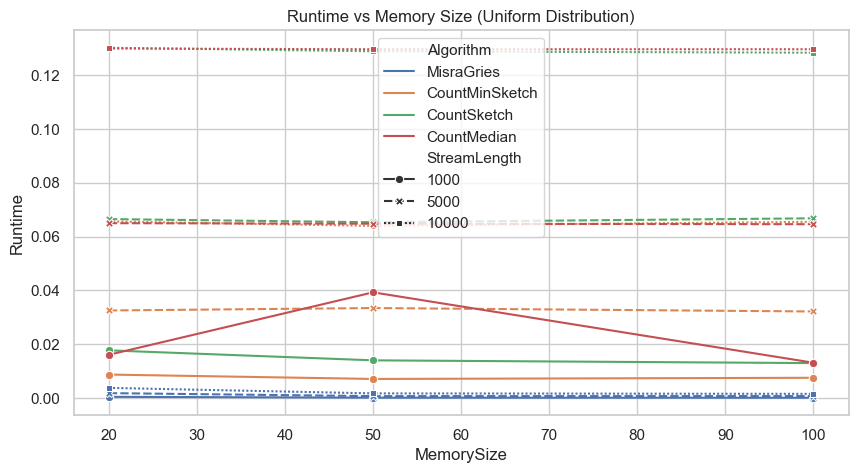

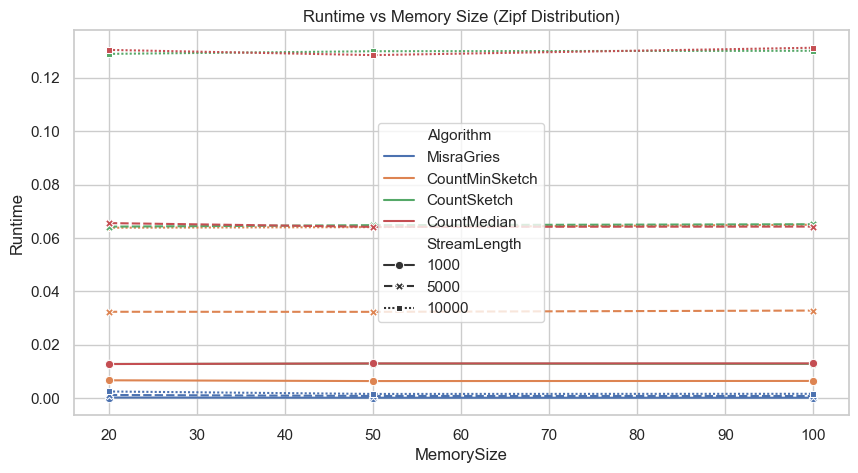

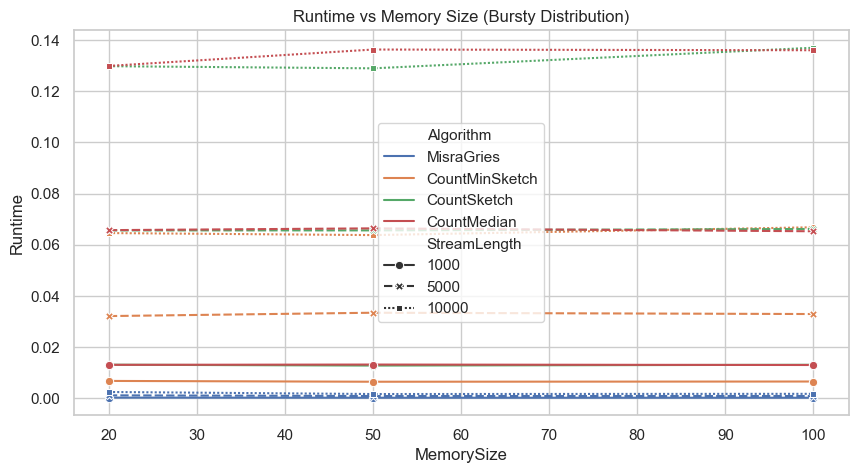

In [41]:
### Visualization Runtime vs Memory

for dist in distributions:
    subset = benchmark_df[benchmark_df["Distribution"] == dist]
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=subset, x="MemorySize", y="Runtime",
                 hue="Algorithm", style="StreamLength", markers=True)
    plt.title(f"Runtime vs Memory Size ({dist.capitalize()} Distribution)")
    plt.grid(True)
    plt.show()


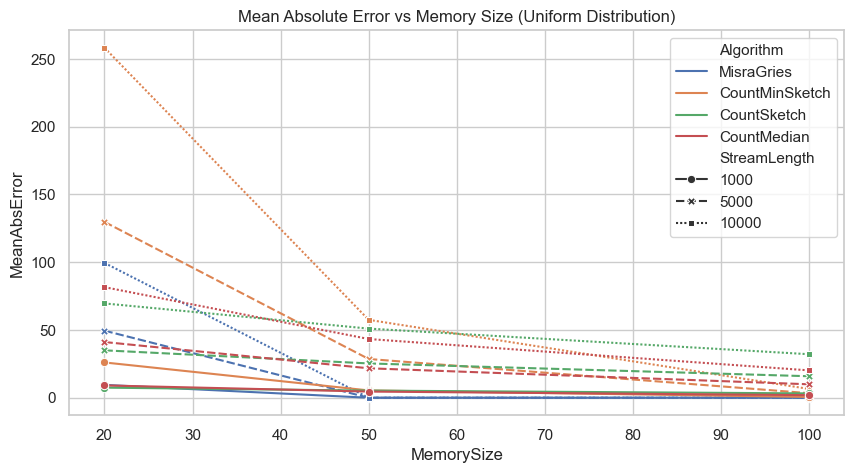

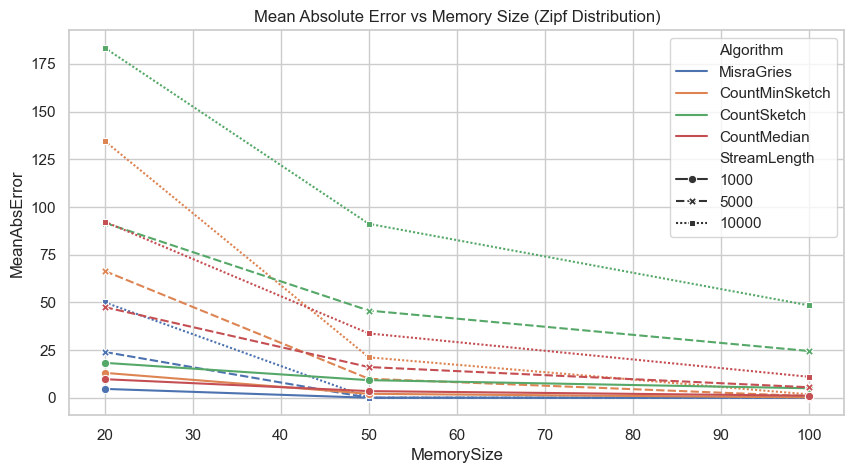

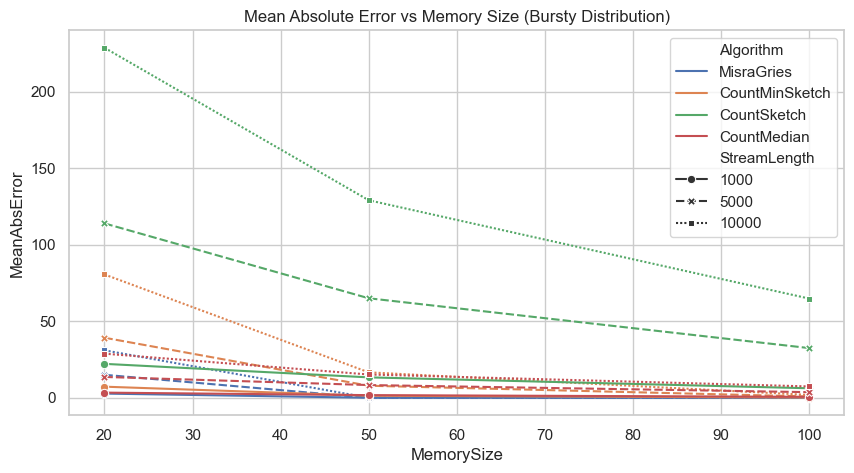

In [42]:
### Visualization2 MeanAbsErr vs Memory

for dist in distributions:
    subset = benchmark_df[benchmark_df["Distribution"] == dist]
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=subset, x="MemorySize", y="MeanAbsError",
                 hue="Algorithm", style="StreamLength", markers=True)
    plt.title(f"Mean Absolute Error vs Memory Size ({dist.capitalize()} Distribution)")
    plt.grid(True)
    plt.show()


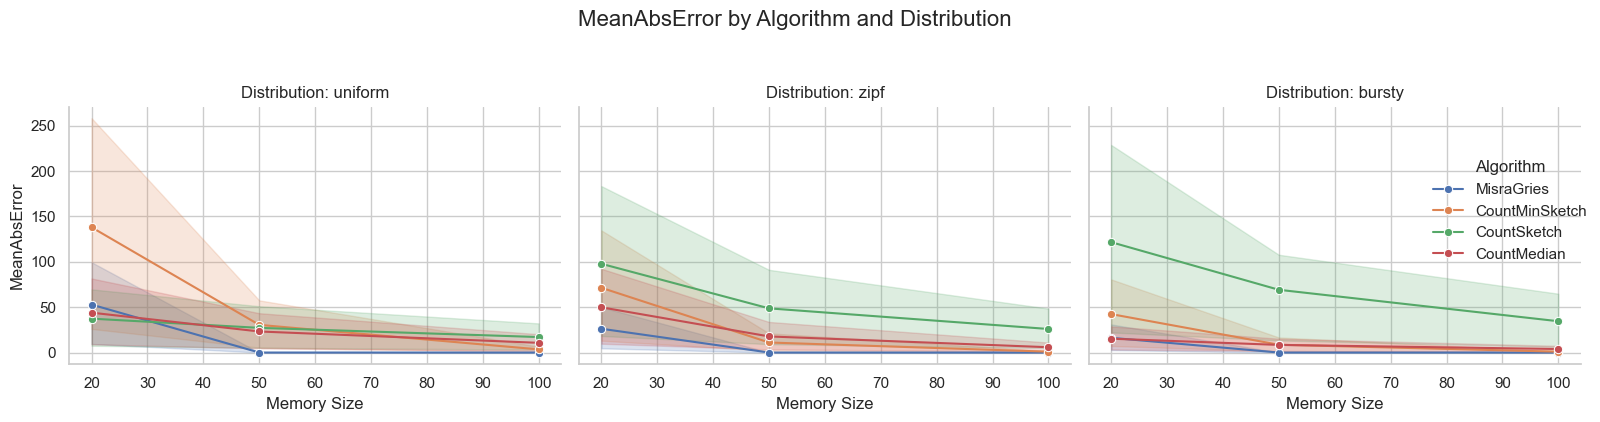

In [43]:
g = sns.FacetGrid(
    benchmark_df, 
    col="Distribution", 
    hue="Algorithm", 
    col_order=["uniform", "zipf", "bursty"],
    height=4, 
    aspect=1.2, 
    sharey=True
)


g.map(sns.lineplot, "MemorySize", "MeanAbsError", marker="o")
g.add_legend(title="Algorithm")
g.set_axis_labels("Memory Size", "MeanAbsError")
g.set_titles("Distribution: {col_name}")
plt.suptitle("MeanAbsError by Algorithm and Distribution", y=1.05, fontsize=16)
plt.tight_layout()
plt.show()

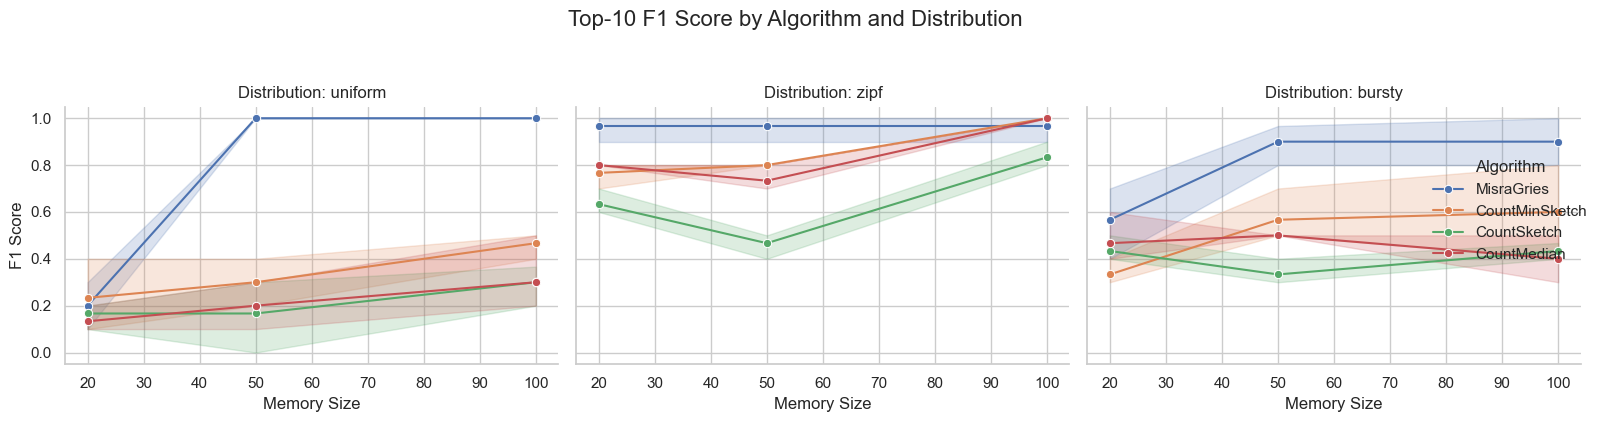

In [44]:
### Visualization3 F-1 Score 
g = sns.FacetGrid(
    benchmark_df, 
    col="Distribution", 
    hue="Algorithm", 
    col_order=["uniform", "zipf", "bursty"],
    height=4, 
    aspect=1.2, 
    sharey=True
)

g.map(sns.lineplot, "MemorySize", "F1@10", marker="o")
g.add_legend(title="Algorithm")
g.set_axis_labels("Memory Size", "F1 Score")
g.set_titles("Distribution: {col_name}")
plt.suptitle("Top-10 F1 Score by Algorithm and Distribution", y=1.05, fontsize=16)
plt.tight_layout()
plt.show()

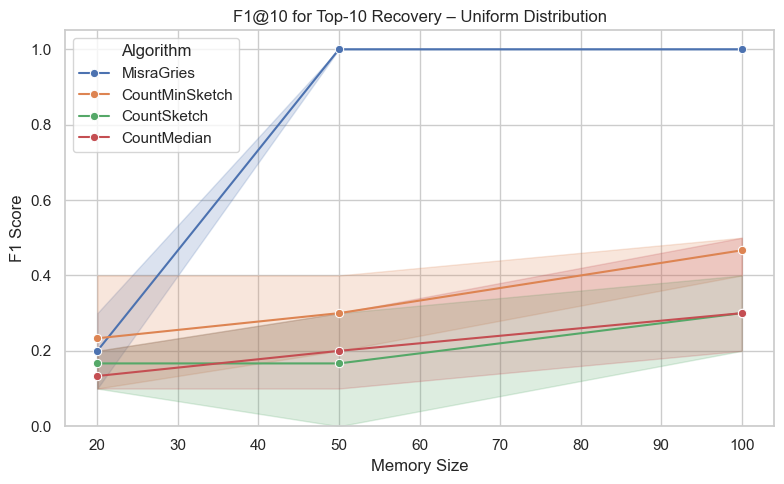

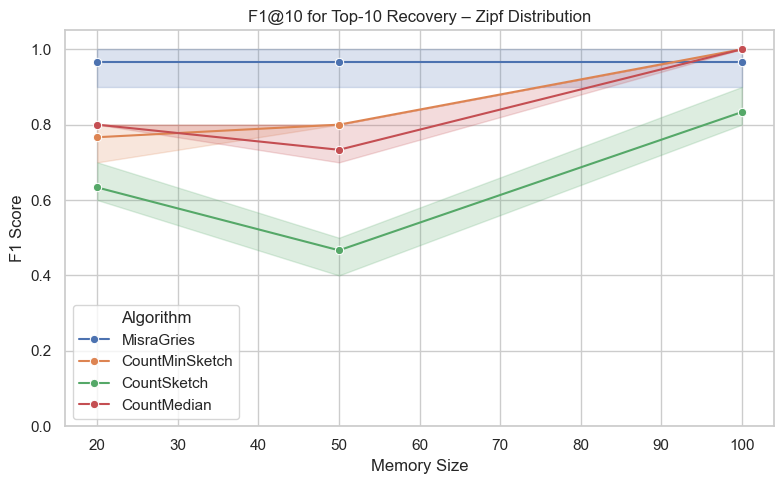

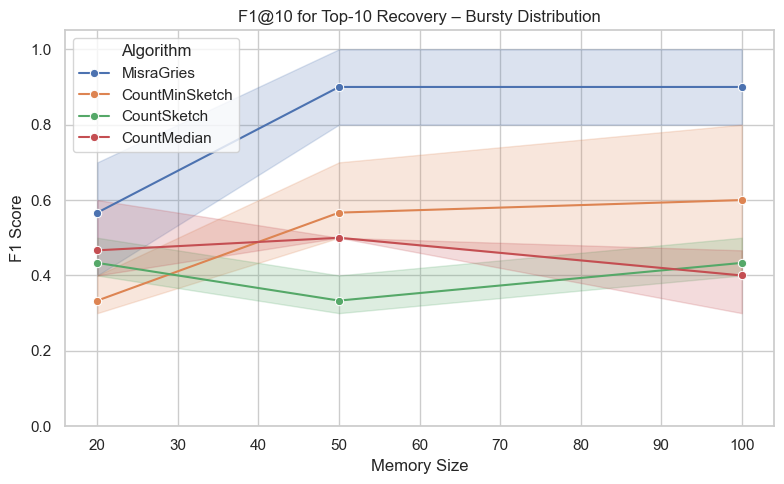

In [45]:
sns.set(style="whitegrid")
distributions = benchmark_df["Distribution"].unique()

for dist in distributions:
    subset = benchmark_df[benchmark_df["Distribution"] == dist]
    
    plt.figure(figsize=(8, 5))
    sns.lineplot(data=subset, x="MemorySize", y="F1@10", hue="Algorithm", marker="o")
    plt.title(f"F1@10 for Top-10 Recovery – {dist.capitalize()} Distribution")
    plt.xlabel("Memory Size")
    plt.ylabel("F1 Score")
    plt.ylim(0, 1.05)
    plt.legend(title="Algorithm")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [59]:
for dist in distributions:
    subset = benchmark_df[benchmark_df["Distribution"] == "bursty"]
    subset = subset[subset['MemorySize'] == 100]
    display(subset)
    break

,Algorithm,Distribution,StreamLength,MemorySize,MeanAbsError,MeanRelError,Runtime,Precision@10,Recall@10,F1@10
80,MisraGries,bursty,1000,100,0.000000,0.000000,0.000167,0.9,0.9,0.9
81,CountMinSketch,bursty,1000,100,0.108696,0.036051,0.006510,0.8,0.8,0.8
82,CountSketch,bursty,1000,100,6.195652,2.212500,0.013055,0.5,0.5,0.5
83,CountMedian,bursty,1000,100,0.608696,0.209601,0.012963,0.5,0.5,0.5
92,MisraGries,bursty,5000,100,0.000000,0.000000,0.000844,0.8,0.8,0.8
93,CountMinSketch,bursty,5000,100,0.830000,0.057672,0.032892,0.6,0.6,0.6
94,CountSketch,bursty,5000,100,32.480000,2.547465,0.066149,0.4,0.4,0.4
95,CountMedian,bursty,5000,100,3.660000,0.284101,0.065249,0.4,0.4,0.4
104,MisraGries,bursty,10000,100,0.000000,0.000000,0.001698,1.0,1.0,1.0
105,CountMinSketch,bursty,10000,100,1.830000,0.060637,0.066815,0.4,0.4,0.4


In [55]:
# best_perform_df = benchmark_df[['Algorithm','Distribution', "StreamLength","MemorySize", "MeanAbsError"]]
best_configs = benchmark_df.loc[benchmark_df.groupby("Algorithm")["MeanAbsError"].idxmin()].sort_values("MeanAbsError")
best_configs

,Algorithm,Distribution,StreamLength,MemorySize,MeanAbsError,MeanRelError,Runtime,Precision@10,Recall@10,F1@10
4,MisraGries,uniform,1000,50,0.000000,0.000000,0.000201,1.0,1.0,1.0
81,CountMinSketch,bursty,1000,100,0.108696,0.036051,0.006510,0.8,0.8,0.8
83,CountMedian,bursty,1000,100,0.608696,0.209601,0.012963,0.5,0.5,0.5
10,CountSketch,uniform,1000,100,3.210000,0.355950,0.013034,0.2,0.2,0.2


In [68]:
best_configs = benchmark_df.loc[benchmark_df.groupby("Algorithm")["F1@10"].idxmax()].sort_values("F1@10")
best_configs[["Algorithm", "Distribution", "StreamLength", "MemorySize", "F1@10"]]

,Algorithm,Distribution,StreamLength,MemorySize,F1@10
46,CountSketch,zipf,1000,100,0.9
47,CountMedian,zipf,1000,100,1.0
45,CountMinSketch,zipf,1000,100,1.0
4,MisraGries,uniform,1000,50,1.0
